##  Projeto Projeto - Aplicação de Redes Neurais

Edlaine Gladys - Maio 2021



## Introdução: Business Problem <a name="introduction"></a>

>Objetivo: O aluno deverá ser capaz de realizar uma análise completa dos dados e projetar uma rede neural para resolver o problema. 

>Avaliar osresultados obtidos através das métricas de classificação.

>Problema: 

>De posse de dados que correspondem a sinais de transitórios de eletrodomésticos (sinais obtidos em uma janela de 2s ao se ligar equipamento) e que foram rotulados em 7 diferentes classes, seguindo os passos da tabela abaixo.

### Tabela:

|Tópicos         | Descrição do processo  | 
|------------------ |---------|
|      |        |        
|[1.Aquisição e limpeza dos dados](#data)|Carregar os dados e realizar a limpeza dos dados (se necessário)        |
|      |        |      
|  [2.Vizualização das classes](#classes)      | Visualizar os dados para compreensão (Plotar 1 exemplo de cada Classe)      |
|      |        |  
|  [3. Transformação Multilabels](#label)      | Como é um problema muticlasse,transformar oslabels para uma representação correta. |
|      |        |  
| [4.Preparação dos dados para Machine Learning](#preparacao)  |  Preparar os dados para se apresentados à ML      | 
|      |        |  
|   [5.Construindo o modelo de Rede Neural](#analysis)   | Construir a rede neural com seus respectivos parâmetros (taxa deaprendizado, número de camadas intermediárias, número de neurônios, batch_size etc)       |  
|      |        |  
|   [6.Avaliação do modelo](#results)   |Testar e validar os resultados        | 
|      |        |  
|    [7.PCA](#PCA)  |Uso de PCA (Análise de Componentes Principais) para visualização dos dados e também como speed-up da ML (para fins de classificação)   |
|      |        |  
|    [8.Conclusão](#conclusion)  |     Discussão do resultado   |  




## Aquisição e limpeza dos dados <a name="data"></a>

Carregando as bibilotecas necessárias.

In [87]:
import pandas as pd
import numpy as np
import dtale
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

Carregando os dados:

In [88]:
df= pd.read_csv("db.csv")
df.head()

,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,...,t191,t192,t193,t194,t195,t196,t197,t198,t199,Classes
0,24.00,24.00,23.00,25.00,24.00,25.00,24.00,24.00,22.00,25.00,...,1.00,-1.00,1.00,-1.00,1.00,0.00,1.00,0.00,0.00,1
1,23.00,23.00,22.00,21.00,21.00,22.00,23.00,23.00,22.00,21.00,...,-1.00,1.00,0.00,1.00,-1.00,0.00,-1.00,1.00,0.00,1
2,-0.55,-0.55,-0.55,3.45,13.45,11.45,18.45,18.45,20.45,20.45,...,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55,1
3,12.30,10.30,15.30,15.30,16.30,15.30,17.30,16.30,17.30,15.30,...,-0.70,0.30,-0.70,0.30,-0.70,1.30,-0.70,1.30,-0.70,1
4,24.85,2.85,5.85,-1.15,2.85,-1.15,1.85,-1.15,0.85,-1.15,...,-0.15,0.85,-1.15,-0.15,-1.15,0.85,-0.15,0.85,-0.15,2


Usando a biblioteca ```datle``` para ter uma visualização mais ampla dos dados.

In [89]:
dtale.show(df)

In [90]:
df.shape

(100, 201)

In [91]:
df.describe()

,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,...,t191,t192,t193,t194,t195,t196,t197,t198,t199,Classes
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,11.114000,7.974000,8.154000,7.334000,7.374000,6.834000,7.134000,6.874000,7.054000,6.594000,...,0.114000,-0.14600,-0.146000,0.154000,0.014000,0.374000,-0.20600,-0.146000,-0.186000,3.140000
std,10.187807,9.012776,8.899937,8.958318,8.458134,8.301816,8.230796,8.317599,8.269182,7.937996,...,2.253057,0.86292,0.829497,1.009442,1.114779,0.969548,0.78757,1.046004,0.838411,1.608186
min,-10.150000,-6.300000,-6.300000,-6.300000,-5.300000,-3.500000,-4.300000,-6.300000,-6.300000,-4.300000,...,-2.500000,-2.40000,-2.050000,-2.500000,-2.150000,-2.500000,-2.30000,-2.500000,-2.050000,1.000000
25%,0.650000,0.450000,0.700000,0.450000,0.650000,0.450000,0.600000,0.850000,0.650000,0.650000,...,-0.700000,-0.75000,-0.700000,-0.550000,-0.800000,-0.100000,-0.70000,-0.750000,-0.700000,2.000000
50%,11.925000,5.575000,4.950000,4.300000,3.600000,3.050000,3.300000,3.325000,3.225000,3.850000,...,-0.300000,-0.07500,-0.200000,0.275000,-0.075000,0.400000,-0.32500,-0.025000,-0.275000,3.000000
75%,21.250000,14.900000,17.450000,16.950000,14.900000,13.000000,14.000000,13.000000,11.950000,10.950000,...,0.300000,0.45000,0.550000,0.700000,0.700000,0.850000,0.35000,0.450000,0.250000,4.000000
max,25.850000,25.450000,26.200000,25.200000,25.200000,25.000000,24.200000,25.200000,26.200000,25.200000,...,13.550000,1.70000,1.500000,2.650000,3.500000,3.800000,1.35000,1.850000,2.500000,7.000000


###  Verficar valores nulos 

In [92]:
df.isnull().sum()

t0         0
t1         0
t2         0
t3         0
t4         0
          ..
t196       0
t197       0
t198       0
t199       0
Classes    0
Length: 201, dtype: int64

In [93]:
df.dtypes

t0         float64
t1         float64
t2         float64
t3         float64
t4         float64
            ...   
t196       float64
t197       float64
t198       float64
t199       float64
Classes      int64
Length: 201, dtype: object

###  Preparando os dados para visualização 

Cada classe contém um quantidade de aparelhos eletrodomésticos que transmitem sinais obtidos em uma janela de 2s ao se ligar equipamento) e que foram rotulados em 7 diferentes classes.

In [96]:
df["Classes"].value_counts()

3    30
2    22
5    16
1    16
4     8
7     4
6     4
Name: Classes, dtype: int64

In [97]:
df.columns

Index(['t0', 't1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9',
       ...
       't191', 't192', 't193', 't194', 't195', 't196', 't197', 't198', 't199',
       'Classes'],
      dtype='object', length=201)

Renomeando as colunas para visualização 

In [98]:
df.columns = df.columns.str.replace('t', '') 
df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '191', '192', '193', '194', '195', '196', '197', '198', '199',
       'Classes'],
      dtype='object', length=201)

Será plotado um aparelho de cada classe, para visualizar seus registros ao longo do tempo. Foi escolhido o primeiro aparelho de cada classe.

Para visualização, foi selecionado o primeiro aparelho de cada uma das sete classes.

In [99]:
df1=df[df["Classes"]==1].iloc[0]
df2=df[df["Classes"]==2].iloc[0]
df3=df[df["Classes"]==3].iloc[0]
df4=df[df["Classes"]==4].iloc[0]
df5=df[df["Classes"]==5].iloc[0]
df6=df[df["Classes"]==6].iloc[0]
df7=df[df["Classes"]==7].iloc[0]

# Criando um Dataframe

df_new=pd.DataFrame({ 'Classe1':df1,'Classe2':df2,'Classe3':df3,'Classe4':df4,
                     'Classe5':df5,'Classe6':df6,'Classe7':df7})

df_new.head()

,Classe1,Classe2,Classe3,Classe4,Classe5,Classe6,Classe7
0,24.0,24.85,14.3,9.65,14.35,11.55,-5.3
1,24.0,2.85,11.3,-1.35,10.35,5.55,-6.3
2,23.0,5.85,8.3,2.65,5.35,2.55,-6.3
3,25.0,-1.15,8.3,-1.35,4.35,1.55,-6.3
4,24.0,2.85,8.3,0.65,3.35,0.55,-5.3


## Vizualização das classes <a name="classes"></a> 

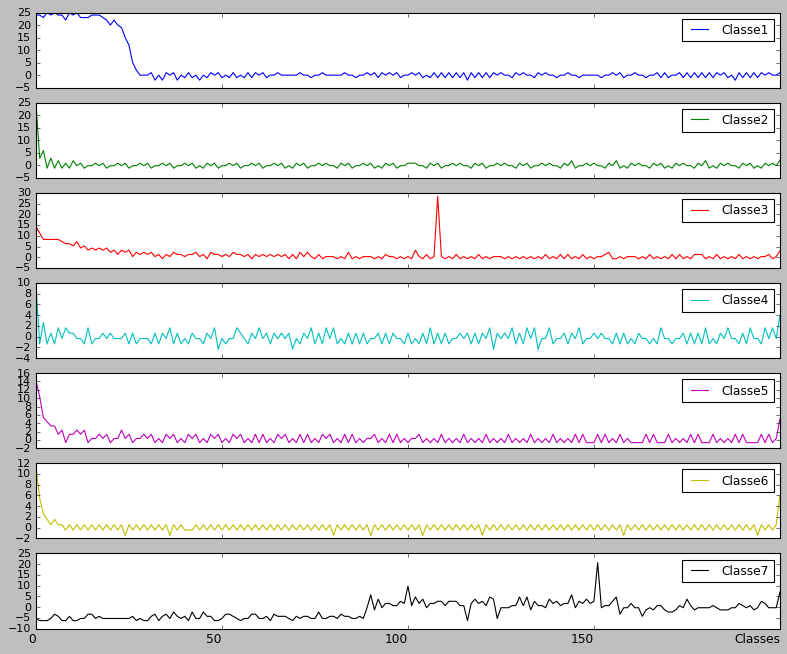

In [100]:
# Plotting average venues per cluster
#plt.style.use('classic')
axes = df_new.plot.line(rot=0, subplots=True)
#axes[1].legend(loc=0)
plt.rcParams['figure.figsize'] = [12, 11]
plt.show()
plt.rc('axes', titlesize=11)
plt.rc('xtick', labelsize=11)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)
plt.rc('legend', fontsize=11)

plt.show()

#### Visualizando Individualmente 

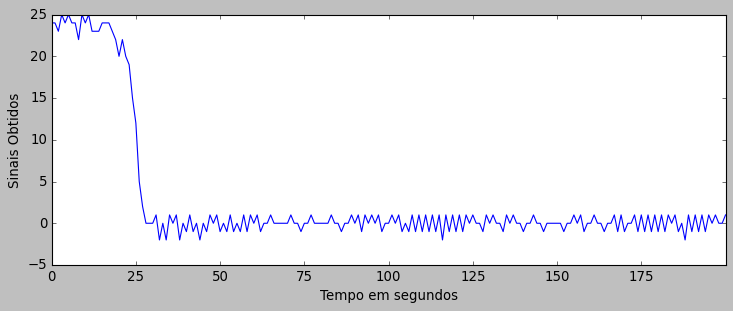

In [101]:
# Visualizar apenas um
plt.style.use('classic')
figure= plt.figure(figsize=(600,15))
plt.subplot(4,4,1)
plt.plot(df[df["Classes"]==1].iloc[0])
plt.xlabel('Tempo em segundos')
plt.ylabel('Sinais Obtidos')
plt.gcf().set_size_inches(50, 18) # alterar tamanho
plt.xticks(range(0, 200,25)) # mudar escala do eixo X
plt.show()


## 3. Transformação Multilabels<a name="label"></a>

Como é um problema muticlasse, o aluno deverá transformar os
labels para uma representação correta.

In [102]:
dummy=pd.get_dummies(df['Classes'])
df=pd.concat([df,dummy],axis=1)
df.drop("Classes",axis=1, inplace=True)
df

,0,1,2,3,4,5,6,7,8,9,...,197,198,199,1,2,3,4,5,6,7
0,24.00,24.00,23.00,25.00,24.00,25.00,24.00,24.00,22.00,25.00,...,1.00,0.00,0.00,1,0,0,0,0,0,0
1,23.00,23.00,22.00,21.00,21.00,22.00,23.00,23.00,22.00,21.00,...,-1.00,1.00,0.00,1,0,0,0,0,0,0
2,-0.55,-0.55,-0.55,3.45,13.45,11.45,18.45,18.45,20.45,20.45,...,-0.55,0.45,-0.55,1,0,0,0,0,0,0
3,12.30,10.30,15.30,15.30,16.30,15.30,17.30,16.30,17.30,15.30,...,-0.70,1.30,-0.70,1,0,0,0,0,0,0
4,24.85,2.85,5.85,-1.15,2.85,-1.15,1.85,-1.15,0.85,-1.15,...,-0.15,0.85,-0.15,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,14.70,4.70,2.70,-0.30,0.70,0.70,2.70,1.70,1.70,0.70,...,-1.30,-1.30,-0.30,0,0,0,0,1,0,0
96,11.55,5.55,2.55,1.55,0.55,1.55,0.55,0.55,-0.45,0.55,...,0.55,-0.45,0.55,0,0,0,0,0,1,0
97,14.35,4.35,1.35,2.35,-0.65,0.35,0.35,1.35,0.35,0.35,...,0.35,0.35,-0.65,0,0,0,0,0,1,0
98,22.70,-5.30,-0.30,-5.30,-1.30,-3.30,-1.30,-3.30,-2.30,-3.30,...,-2.30,0.70,-1.30,0,0,0,0,0,0,1



## 4. Preparação dos dados para Machine Learning<a name="preparacao"></a>



Esta etapa tem 3 processos

- Definir as variáveis de entrada e saída 
- Separar em treino e teste 
- Normalizar os dados 

#### 1. Definir as variáveis de entrada e saída para o  modelo 

In [103]:
df_saida=df[[1,2,3,4,5,6,7]]
df_entrada=df.drop([1,2,3,4,5,6,7],axis=1)


#### 2. Separar  em Treino e Teste 

In [104]:
X_train, X_test, y_train, y_test = train_test_split(df_entrada, df_saida, test_size=0.3,
                                                    stratify=df_saida)
# Não tem validação por que é pequena a amostra

#X_test, X_val, y_test, y_val=train_test_split(X_test, y_test, test_size=0.1,stratify=y_test)

#### 3. Normalizar os Dados 

Ao escalonar, o fit no objeto criado para esse fim é apenas feito no treino, para que o objeto de escalonamento não aprenda características do teste, apenas do treino.

Transforma os demais na mesma escala q foi fitado, não cria uma escala nova.

In [105]:
scaler = StandardScaler()

# O fit é apenas no treino 

X_train = scaler.fit_transform(X_train)

# No teste é apenas transformar 

X_test = scaler.transform(X_test)

## Construindo o modelo de Rede Neural<a name="analysis"></a>


 Será utlizado  para este processo o ```MLPClassifier``` do  sklearn.neural_network module includes models based on neural networks. [MLPClassifier]('https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier')
 

Parâmetros :
    
a) Learning rate - taxa de aprendizado , fator que multiplica o gradiente (atualização dos pesos)
achar os mínimos locais 

b) Hidden Size - número de neurônios na camada intermediária ; número de camadas

c) Activation - função de mapeamento de cada neurônio

d) early_stopping - se não há melhoria no conjunto de validação, ele para 

e) Epochs - época representa uma passada por todo o conjunto de treino

e.1) Batch size - tamanho dos subconjuntos de treinos que serão apresentados à rede neural (Batelada) 

##### Usar o Grid Search para encontrar o melhor parâmetro para o modelo.
Definindo os parâmetros, foram escolhidos algumas funções de ativação, como também outras de otimização

In [106]:
parameters = {'hidden_layer_sizes': range(1,50,2),'activation':('identity','logistic', 'tanh','relu'),
             'solver':('lbfgs', 'sgd', 'adam')}

In [107]:
clfGrid=MLPClassifier(random_state=1,max_iter=10000, verbose=False, validation_fraction=0.1,early_stopping=True)

#Construindo o modelo com GridSearch

GridModel=GridSearchCV(clfGrid,parameters)

GridModel.fit(X_train, y_train)

print(GridModel.best_estimator_)

MLPClassifier(early_stopping=True, hidden_layer_sizes=43, max_iter=10000,
              random_state=1, solver='lbfgs')


In [108]:
# Melhores parâmetros para o Modelo
model=GridModel.best_estimator_

model

MLPClassifier(early_stopping=True, hidden_layer_sizes=43, max_iter=10000,
              random_state=1, solver='lbfgs')

## Avaliação do modelo com o GridSearch <a name="results"></a>

In [109]:
model.fit(X_train, y_train)

MLPClassifier(early_stopping=True, hidden_layer_sizes=43, max_iter=10000,
              random_state=1, solver='lbfgs')

In [110]:
model.score(X_train,y_train)

1.0

In [111]:
model.score(X_test,y_test)

0.8

In [112]:
model.predict(X_test)[0]

array([0, 0, 1, 0, 0, 0, 0])

## PCA<a name="pca"></a>

Avaliar o usa de PCA (Análise de Componentes Principais) para visualização dos dados e também como speed-up da ML (para fins de classificação).

In [113]:
pca = PCA().fit(X_train)

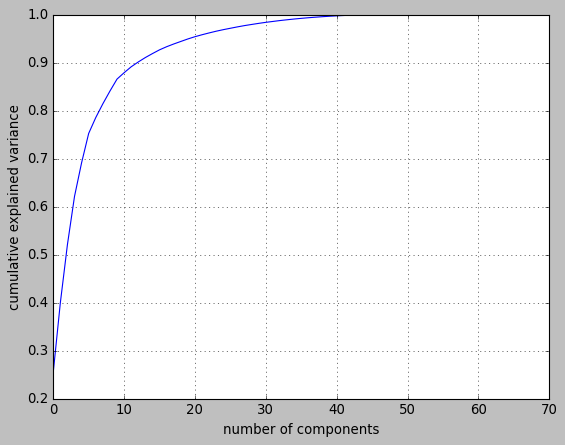

In [114]:
plt.figure(figsize = (8, 6))
plt.grid()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');


In [115]:
pca = PCA(n_components=0.88)
pca.fit(X_train)
X_pca_Train = pca.transform(X_train)

In [116]:
print(f'Original Model dimensionality: {X_train.shape}')
print(f'PCA Model dimensionality: {X_pca_Train.shape}')

Original Model dimensionality: (70, 200)
PCA Model dimensionality: (70, 12)


### GridSerach para encontrar o melhor modelo depois do PCA

In [117]:
clf_grid_PCA = MLPClassifier(random_state=1,max_iter=10000,validation_fraction=0.1,early_stopping=True,verbose=False)

gridmodel_PCA = GridSearchCV(clf_grid_PCA, parameters)

gridmodel_PCA.fit(X_pca_Train, y_train)

print(gridmodel_PCA.best_estimator_)

MLPClassifier(activation='logistic', early_stopping=True, hidden_layer_sizes=13,
              max_iter=10000, random_state=1, solver='lbfgs')


In [118]:
# Melhores parâmetros para o Modelo
model_PCA = gridmodel_PCA.best_estimator_

model_PCA

MLPClassifier(activation='logistic', early_stopping=True, hidden_layer_sizes=13,
              max_iter=10000, random_state=1, solver='lbfgs')

Retorno do modelo com GRidSearch com o PCA e sem PCA, para verificar se houve uma mudança na construção do modelo.

In [119]:
print("Sem PCA:\n" ,"\n",model,"\n")
print("------------------")
print("Com PCA: \n" ,"\n",model_PCA,"\n")

Sem PCA:
 
 MLPClassifier(early_stopping=True, hidden_layer_sizes=43, max_iter=10000,
              random_state=1, solver='lbfgs') 

------------------
Com PCA: 
 
 MLPClassifier(activation='logistic', early_stopping=True, hidden_layer_sizes=13,
              max_iter=10000, random_state=1, solver='lbfgs') 



 >Conforme observado o número de número de neurônios ```hidden_layer_sizes``` aumentou de 13 para 43,  interessante observar que neste caso o GridSearch com PCA apresentou um modelo que aumentou  o número de número de neurônios.

### Usando o modelo com PCA

In [120]:
#model= MLPClassifier(activation='logistic', early_stopping=True, hidden_layer_sizes=27,
              #max_iter=10000, random_state=1, solver='lbfgs', verbose=True)

model_PCA.fit(X_pca_Train, y_train)

MLPClassifier(activation='logistic', early_stopping=True, hidden_layer_sizes=13,
              max_iter=10000, random_state=1, solver='lbfgs')

In [121]:
model_PCA.predict(pca.transform(X_test))[0]

array([0, 0, 1, 0, 0, 0, 0])

## Avaliando o modelo  Sem PCA

In [122]:
print('****** Sem PCA  ******')

print("Treino:",model.score(X_train,y_train))

print("Teste:",model.score(X_test,y_test))


****** Sem PCA  ******
Treino: 1.0
Teste: 0.8


In [123]:
y_pred = model.predict(X_test)
y_real = y_test.to_numpy()

ytrue = []
yhat = []

for n in y_real:
    ytrue.append(str(n))

for n in y_pred:
    yhat.append(str(n))


print('****** Sem PCA Model Results ******')

print("Accuracy: ", round(metrics.accuracy_score(ytrue, yhat),2))
print(metrics.classification_report(ytrue, yhat, digits=2))



****** Sem PCA Model Results ******
Accuracy:  0.8
                 precision    recall  f1-score   support

[0 0 0 0 0 0 0]       0.00      0.00      0.00         0
[0 0 0 0 0 0 1]       1.00      1.00      1.00         1
[0 0 0 0 0 1 0]       0.33      1.00      0.50         1
[0 0 0 0 1 0 0]       1.00      1.00      1.00         5
[0 0 0 1 0 0 0]       1.00      1.00      1.00         2
[0 0 1 0 0 0 0]       1.00      0.56      0.71         9
[0 1 0 0 0 0 0]       1.00      0.71      0.83         7
[1 0 0 0 0 0 0]       1.00      1.00      1.00         5

       accuracy                           0.80        30
      macro avg       0.79      0.78      0.76        30
   weighted avg       0.98      0.80      0.86        30



## Avaliando o modelo  Com PCA

In [124]:
#  Com PCA 

X_pca_Test = pca.transform(X_test)

print('****** Com PCA ******')

print("Treino:",model_PCA.score(X_pca_Train,y_train))

print("Teste:",model_PCA.score(X_pca_Test,y_test))


****** Com PCA ******
Treino: 0.9428571428571428
Teste: 0.7333333333333333


In [125]:
y_pred1 = model_PCA.predict(pca.transform(X_test))
yhat1 = []


for n in y_pred1:
    yhat1.append(str(n))

print('****** Com PCA Model Results ******')

print("Accuracy: ", round(metrics.accuracy_score(ytrue, yhat1),2))
print(metrics.classification_report(ytrue, yhat1, digits=2))


****** Com PCA Model Results ******
Accuracy:  0.73
                 precision    recall  f1-score   support

[0 0 0 0 0 0 0]       0.00      0.00      0.00         0
[0 0 0 0 0 0 1]       1.00      1.00      1.00         1
[0 0 0 0 0 1 0]       1.00      1.00      1.00         1
[0 0 0 0 1 0 0]       1.00      0.80      0.89         5
[0 0 0 1 0 0 0]       1.00      1.00      1.00         2
[0 0 1 0 0 0 0]       1.00      0.56      0.71         9
[0 0 1 1 0 0 0]       0.00      0.00      0.00         0
[0 1 0 0 0 0 0]       1.00      0.57      0.73         7
[1 0 0 0 0 0 0]       1.00      1.00      1.00         5

       accuracy                           0.73        30
      macro avg       0.78      0.66      0.70        30
   weighted avg       1.00      0.73      0.83        30



## Conclusão<a name="conclusao"></a>

### Score
A tabela abaixo segue com a acurácia do modelo antes e depois da PCA

| MLPClassifier     | Sem PCA | Com PCA |
|--------------------|---------|----------|
|      |       |        |     |
|Score Treino                | 1.0       |   0.94   | 
|      |        |        |       |
| Score Teste     | 0.8        | 0.7333      |

Para encontrar os melhores parâmetros para construir o modelo foi usado o GridSearch, ainda sim o score não satisfatório, em busca de uma melhor performance do modelo optou-se em utlizar o PCA-Principal component analysis- que reduziu 88% a dimensionalidade, passando de 200 para 10 componentes, registrando uma perda considerável na acurácia 80% para 73%  do modelo original. 

    Talvez uma caminho razoável seja construir esta rede neural com o TensorFlow para comparar          estes valores, ou seja buscar um modelo que ofereça uma acurácia melhor.